In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch

In [2]:
# fixing random state for reproducibility
np.random.seed(197597056)

In [3]:
# generate a simple bivariate normal distribution
delta = 0.025
x, y = np.meshgrid(np.arange(-3.0, 3.0, delta), np.arange(-3.0, 3.0, delta))
z1 = np.exp(-x ** 2 - y ** 2)
z2 = np.exp(-(x - 1) ** 2 - (y - 1) ** 2)
z = (z1 - z2) * 2

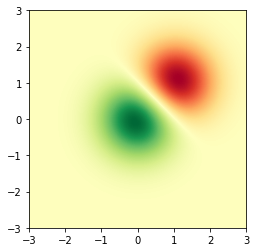

In [4]:
fig, ax = plt.subplots()
im = ax.imshow(
    z, interpolation="bilinear", cmap=cm.RdYlGn,
    origin="lower", extent=[-3, 3, -3, 3],
    vmax=np.max(np.abs(z)), vmin=-np.max(np.abs(z)),
)
plt.show()

In [5]:
# a sample image
with cbook.get_sample_data("grace_hopper.jpg") as image_file:
    image = plt.imread(image_file)

# and another image, using 256x256 16-bit integers
w, h = 256, 256
with cbook.get_sample_data("s1045.ima.gz") as datafile:
    s = datafile.read()

a = np.frombuffer(s, np.uint16).astype(float).reshape((w, h))

extent = (0, 25, 0, 25)
markers = [(15.9, 14.5), (16.8, 15)]
x, y = zip(*markers)

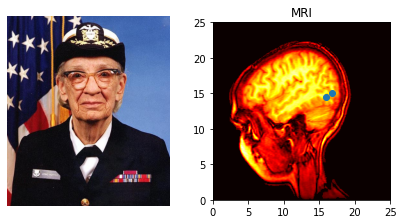

In [6]:
fig, ax = plt.subplot_mosaic([["hopper", "mri"]], figsize=(7, 3.5))

ax["hopper"].imshow(image)
ax["hopper"].axis("off") # clear x-axis and y-axis

im = ax["mri"].imshow(a, cmap=plt.cm.hot, origin="upper", extent=extent)
ax["mri"].plot(x, y, "o")
ax["mri"].set_title("MRI")

plt.show()

In [7]:
a = np.random.rand(5, 5)

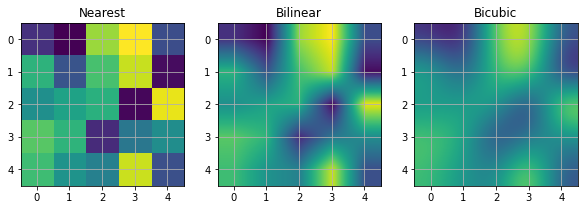

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
for ax, interp in zip(axs, ["nearest", "bilinear", "bicubic"]):
    ax.imshow(a, interpolation=interp)
    ax.set_title(interp.capitalize())
    ax.grid(True)

plt.show()

In [9]:
x = np.arange(120).reshape((10, 12))
interp = "bilinear"

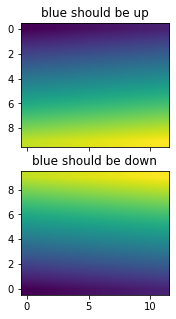

In [10]:
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(3, 5))

axs[0].set_title("blue should be up")
axs[0].imshow(x, origin="upper", interpolation=interp)

axs[1].set_title("blue should be down")
axs[1].imshow(x, origin="lower", interpolation=interp)

plt.show()

In [11]:
delta = 0.025
x, y = np.meshgrid(np.arange(-3.0, 3.0, delta), np.arange(-3.0, 3.0, delta))
z1 = np.exp(-x ** 2 - y ** 2)
z2 = np.exp(-(x - 1) ** 2 - (y - 1) ** 2)
z = (z1 - z2) * 2

path = Path([[0, 1], [1, 0], [0, -1], [-1, 0], [0, 1]])
patch = PathPatch(path, facecolor="none")

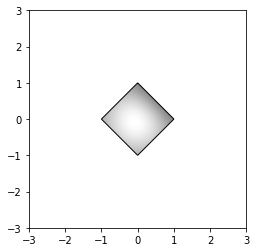

In [12]:
fig, ax = plt.subplots()

ax.add_patch(patch)
im = ax.imshow(
    z, interpolation="bilinear", cmap=cm.gray,
    origin="lower", extent=[-3, 3, -3, 3],
    clip_path=patch, clip_on=True,
)
im.set_clip_path(patch)

plt.show()